# Phase 4 Code Challenge Review

TOC:

  - [PCA](#pca)
  - [NLP](#nlp)
  - [Time Series](#ts)  
  - [Clustering](#clust)


<a id='pca'></a>

# PCA

Principal Component Analysis creates a set of features called principal compenents. PCA reduces the dimensions of our data set from the original n number of features to a specified number of components.  

Describe what the first principal component represents in relation to the original feature set.

It represents the first eigenvector that accounts for the maximum variance of the data set in first principal component.

The first principal component points in the direction that explains the most variance of the original feature set. Each principal component is composed of a combination of the original components. A larger weight in the first principal component indicates a feature with a larger variance in the original feature set.


*YOUR ANSWER HERE*

Why is scaling important for PCA?

Scaling is important because variance in a feature measured in a relatively small unit can be just as or more important than a feature measured in a large unit. In other words, the dependent variable may depend more on the feature with the smaller unit than the large. When transforming a dataset with PCA, the PCA object finds the direction that explains the most total variance in the feature set. It will then tend to identify features with larger units as the most important. By scaling, the unit is taken out of the picture. PCA will be able to identify features whose original scale is smaller, but whose variation correlates more closely with the dependent feature.
Take for example a model that attempts to predict weight of a new born with age of the mother in years and height of the mother in meters. Without scaling, the total variance of age across all subjects will be much greater than the total variance of height, simply because of the unit. If one fits a PCA object to height and age, the first principal component will be more heavily influenced by age. However, the height of the mother likely is a better predictor than age, but because of its relatively small variance in the original unit (meters), its influence is obscured. By scaling, PCA will consider the relative variance of height and age without regard for the unit.

*YOUR ANSWER HERE*

What are some reasons for using PCA?


1. Reduces computational time
2. Reduces multi-collinearity
3. Reduces overfitting
4. Feature selection
5. Brings down to 2 dimensional for visualization


PCA can speed up computation time.
PCA can help with overfitting and decrease the overall prediction error of the model.
A similar advantage to #2 is that PCA eliminates multicollinearity. Because each component is built orthogonally to the last, all multicollinearity is eliminated.
PCA can be used for visualization. Reducing the original data set to two dimensions allows a representation of the data to be plotted on an x-y plane.
PCA can make the data more interpretable. With high dimensional data, by looking at the weights of the different components, one can see which features have siginificant variance, and which don’t.

*YOUR ANSWER HERE*

How can one determine how many principle components to use in a model?

Would this be based off the amount of variance you want to explain by your model.

Each successive principal component explains a different aspect of the variance of the feature set. After the PCA object has been fit, it has an attribute named explained_variance_ratio, which describes what percentage of the variance is explained by each component. The first component will have the largest value for explained variance ratio. And the variance explained will decrease with each successive component. At some point, adding another principal component will result in only a small additional percent of variance explained. Looking at a graph of the number of components vs. cumulative explained variance ratio, the curve will stop increasing significantly and start to level off. A good choice for the number of principal components would be the component after which a significant increase of explained variance stops.
The PCA object can also be given a proportion as the argument p_components. PCA will stop after that decimal. If .8 is given, PCA will stop adding components after the previous components have explained 80% of the variance.



*YOUR ANSWER HERE*

# Now let's implement PCA in code.

In [2]:
import pandas as pd
from sklearn.datasets import  load_breast_cancer
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# appropriately preprocess X

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
sc = ss.fit_transform(X)


In [8]:
# instantiate a pca object with 2 components and fit to preprocessed X

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

fit_data = pca.fit(sc)

In [13]:
# determine how much of the total variance is explained by the first two components

sum(pca.explained_variance_ratio_)


0.6324320765155942

<a id='nlp'></a>


# NLP

In [72]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

Describe what preproccessing steps to take in order to isolate the semantically valuable components of the corpus.

Remove stopwords, make them lowercase, remove punctuation, stem and lemmatize.

Describe the rows and columns of the document term matrix that would result from vectorizing the above corpus. 

Each column would be a word or token, each row would be a document

Describe what the values within the document-term matrix could be.

The value would be some representation of frequency.

Describe how to calculate a TF-IDF score.

Number of times a word appears in a document vs. number of times word appears in everything.

The term frequency component of TFIDF counts the number of times a term shows up in a given document. This number is multiplied by the inverse document frequency. IDF is calculated as the log of the total number of documents divided by the number of documents the term appears in. If the term appears in less documents, the IDF score will be larger.

# NLP Code

In [14]:
# data import
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [74]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

In [18]:
# split into train and test set with default arguments and random_state=42
# note: for demonstration purposes, we will not use cross-validation here nor a holdout set.
# note: whether you pass an array or a dataframe to as the feature set will change how it is
# passed to the vectorizer

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(policies['policy'], policies['candidate'], random_state=42)

In [19]:
# Import and instantiate a Count Vectorizer with defaults

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [24]:
# Transform train and test sets with the Count Vectorizer
# then fit a logistic regression model on it.
# if you get the AttributeError: 'str' object has no attribute 'decode', pass solver='liblinear'

vari = cv.fit_transform(X_train)

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(vari, y_train)



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# Score on both train and test sets.
vari_test = cv.transform(X_test)

print(log.score(vari, y_train))
print(log.score(vari_test, y_test))

1.0
0.9375


Could mess with C value, tolerance, penalty and some parameters in CountVectorizer

In [30]:
from sklearn.pipeline import Pipeline

steps = [('cv', cv), ('log', log)]

pipe = Pipeline(steps)

In [31]:
pipe.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('log', LogisticRegression())])

In [32]:
pipe.score(X_train, y_train)

1.0

In [33]:
pipe.score(X_test, y_test)

0.9375

In [41]:


grid_param= {
    'cv__ngram_range' : [(1,2)],
    'log__penalty' : ['l1', 'l2']
}

In [44]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=pipe, param_grid=grid_param, cv=3)
grid.fit(X_test, y_test)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warni

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('log', LogisticRegression())]),
             param_grid={'cv__ngram_range': [(1, 2)],
                         'log__penalty': ['l1', 'l2']})

In [45]:
grid.score(X_test, y_test)

1.0

# Time Series

In [69]:
import pandas as pd
import numpy as np

In [70]:
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


With the data above, what is the first step in transforming it into data suitable for our time series models?

Convert month into a timeseries object and set it as an object.

*YOUR ANSWER HERE*

In [71]:
ap['Month'] = pd.to_datetime(ap['Month'])
ap.set_index(['Month'], inplace=True)


In [72]:
ap.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


What types of patterns might we expect to find in our time series datasets?

*YOUR ANSWER HERE*

Trend, Seasonality, Cyclical

What type of patterns do you see in the above plot?

Upward trend and some type of cyclical/seasonality with the peaks that re-occur. It looks like increasing variance as the peaks and troughs get more extreme.

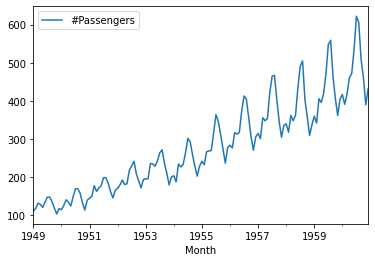

In [74]:
# Add to the plot to visualize patterns by looking at summary statistics across a window of time.

ap.plot();

<AxesSubplot:xlabel='Month'>

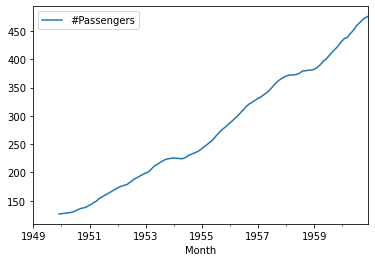

In [75]:
#fig, ax = plt.subplots()

ap.rolling(12).mean().plot()

What are some ways to remove those trends? 

You could do differencing, decomposition (PCA), remove the rolling mean from each data point.

Attempt to make the series stationary using differencing

In [76]:
# ap['diff'] = ap['#Passengers'].diff()
ap.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


How can we diagnose whether we have successfully removed the trends?

Use the Augmented Dickey Fuller test

Use the Augmented Dickey Fuller test to see if the detrended data is ready for modeling

In [77]:
from statsmodels.tsa.stattools import adfuller

adfuller(ap.diff().dropna())


(-2.829266824169999,
 0.05421329028382552,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

It's not stationary because the P-value is greater than the the alpha we'd set as 0.05 which is the second value in the results.

Dicky Fuller doesn't test for variance or seasonality.

<a id='clust'></a>

# Clustering

Describe how the kmeans algorithm updates its cluster centers after initialization.

Drops centroids into the data, and then continues to cluster until it gets an inner and inter value that cannot be optimized any further.

*YOUR ANSWER HERE*

What is inertia, and how does kmeans use inertia to determine the best estimator?

Inertia is a statistic describing how tightly clustered a group of points are. It is calculated by taking all points in a given cluster, finding the sum of squared distance from the centroid, and summing the results across all clusters.
KMeans uses inertia to find optimal cluster centers. Since there is randomness built into the alogorithm’s choice of initial cluster centers, the final centroids will be different across different initializations. When sklearn’s KMeans algo is fit, it runs it a set number of times (see n_init=10 in the docstring), and chooses the run with the lowest inertia as the final model.


Another metric:


In [78]:
# look at the docstring for help
from sklearn.cluster import KMeans

KMeans()

KMeans()

*YOUR ANSWER HERE*

What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

Silhouette score is a measure that describes how similar points are in a cluster to the other points in its cluster, and how dissimilar the points are in a cluster from the next nearest cluster. Unlike inertia, a higher silhouette score is better, and the scores range from -1 to 1.

*YOUR ANSWER HERE*

# Code Cluster Practice with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.

In [79]:
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])
y = data['target']

In [82]:
# Import the relevent clusterer and instantiate an instance of it. 
# Indicate the number of clusters you want

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg = AgglomerativeClustering(n_clusters=3)

In [88]:
# Preprocess the data
ss = StandardScaler()

x_sc = ss.fit_transform(X)
agg.fit(x_sc)

AgglomerativeClustering(n_clusters=3)

In [147]:
# Fit the object

In [92]:
silhouette_score(x_sc, agg.labels_)

0.4466890410285909

In [96]:
for n in range(2,10):
    agg = AgglomerativeClustering(n_clusters=n)
    agg.fit(x_sc)
    print(silhouette_score(x_sc, agg.labels_))
    

0.5770346019475989
0.4466890410285909
0.4006363159855973
0.33058726295230545
0.31485480100512825
0.316969830299128
0.310946529007258
0.31143422475471655


In [97]:
# Determine which is a better number

# 2 clusters is the optimal number